In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Lesson 1
## A few elements of probability and statistics

## Experiment: Let's launch a fair 6-faced die 100 times
### Repeat this experiment 3 times

In [18]:
seq_list = []
for i in xrange(3):
    seq_list.append(np.random.randint(1,7,100))

## Let's plot the results of the 3 experiments
### First plot is the raw data
### Second plot is the running average over time

/home/mcogoni/.local/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice.


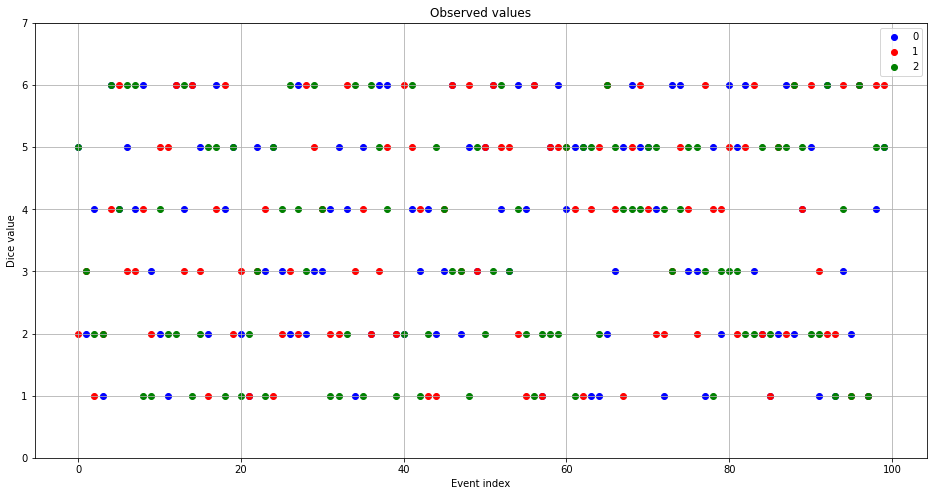

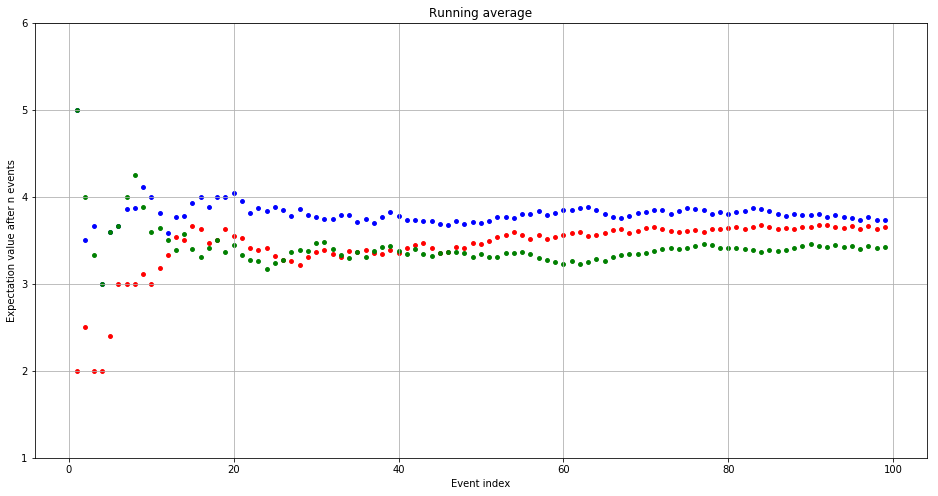

In [20]:
colors = ['b', 'r', 'g', 'y', 'c']

figure(figsize=(16,8))
grid()
title("Observed values")
ylim(0,7)
ylabel("Dice value")
xlabel("Event index")

for c, seq in enumerate(seq_list):
    scatter(range(len(seq)), seq, c=colors[c%len(colors)], label=c)
legend()
figure(figsize=(16,8))
grid()
title("Running average")

ylim(1,6)
ylabel("Expectation value after n events")
xlabel("Event index")

final_mean_list = []
for c, seq in enumerate(seq_list):
    for i,_ in enumerate(seq):
        #pass
        scatter(i, seq[:i].mean(), s=15, c=colors[c%len(colors)])
    final_mean_list.append(seq[:i].mean())

## Law of large numbers
### Let's perform 1000 experiments, each composed by 100 launches
### We want to see how the average values of the 1000 experiments are distributed...

In [30]:
seq_list = []
for i in xrange(1000):
    seq_list.append(np.random.randint(1,7,100))

Variance of means 0.028278161599999997
Std dev of means 0.16816111797915712


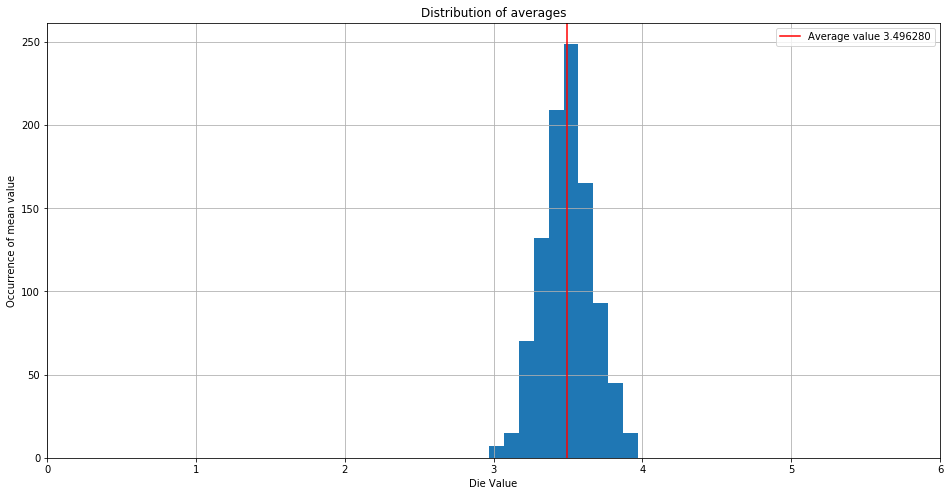

In [31]:
figure(figsize=(16,8))
grid()
title("Distribution of averages")
xlim(0,6)
#ylim(0,6)
ylabel("Occurrence of mean value")
xlabel("Die Value")

mean_value_list = []
for c, seq in enumerate(seq_list):
    mean_value_list.append( seq[:].mean() )
_ = hist(mean_value_list)

average_of_means = mean(mean_value_list)
variance_of_means = var(mean_value_list)
std_dev_of_means = std(mean_value_list)
axvline(average_of_means, c='r', label="Average value %f" %average_of_means)
legend()

print "Variance of means", variance_of_means
print "Std dev of means", std_dev_of_means

## Let's generate 1000 numbers extracted from a Gaussian (normal) distribution

In [61]:
X = np.random.normal(0,1,1000)
Y = np.random.normal(0,1,1000)

Y1 = (2*np.random.rand(1000)-1.)*X**2

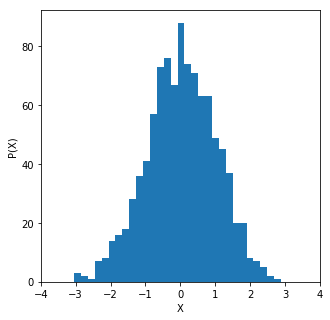

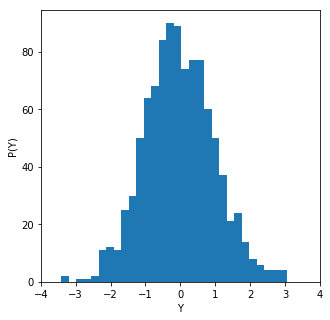

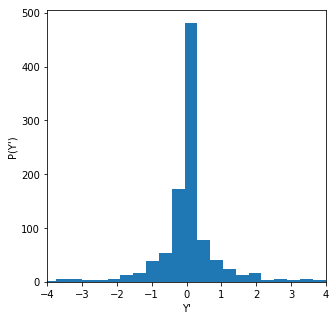

In [62]:
figure(figsize=(5,5))
xlabel ("X")
ylabel ("P(X)")
xlim(-4, 4)
_ = hist(X, bins=30)

figure(figsize=(5,5))
xlabel ("Y")
ylabel ("P(Y)")
xlim(-4, 4)
_ = hist(Y, bins=30)

figure(figsize=(5,5))
xlabel ("Y'")
ylabel ("P(Y')")
xlim(-4, 4)
_ = hist(Y1, bins=30)

## Then, plot the results...

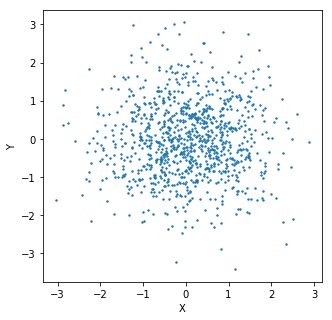

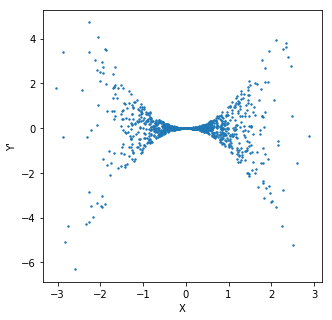

In [63]:
figure(figsize=(5,5))
xlabel ("X")
ylabel ("Y")
scatter(X,Y, s=2)

figure(figsize=(5,5))
xlabel ("X")
ylabel ("Y'")
scatter(X,Y1, s=2)



## Let's see how the binomial distribution explains the 6-faced die

### we create a fair die, we repeat 10.000 times an experiment composed by 100 launches

#### then we plot the distribution of times we obtained K heads (or tails) during each of the 100 launches

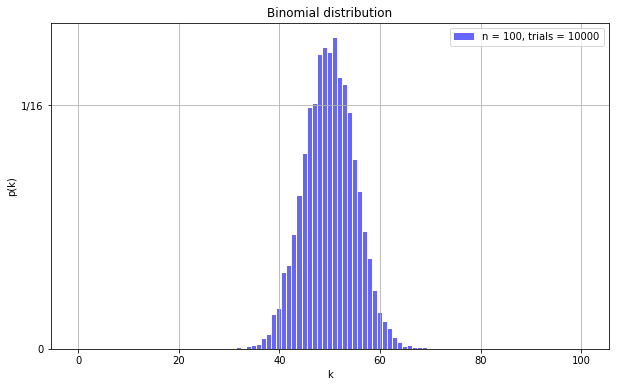

In [71]:
n = 100
bins=np.arange(0,n+2,1)
trials = 10000

fair = np.random.binomial(n, 0.5, trials)

figure(figsize=(10,6))
title("Binomial distribution")
xlabel ("k")
ylabel ("p(k)")
#ylim(0,0.5)
grid()
yticks([0,0.0625, 0.125, 0.25,0.375,0.5], [0,'1/16', '2/16', '4/16', '6/16','8/16' ])
_=hist(fair, bins=bins, normed=True, align='left', histtype='bar', rwidth=0.8, color='b', alpha=0.6, label="n = %d, trials = %d"%(n,trials))
legend()

## Now, let's repeat the 100-launch experiment many more times...

In [72]:
n = 100
bins=np.arange(0,n+2,1)
trials = 1000000


fair = np.random.binomial(n, 0.5, trials) # we repeat the experiment 1 million times!

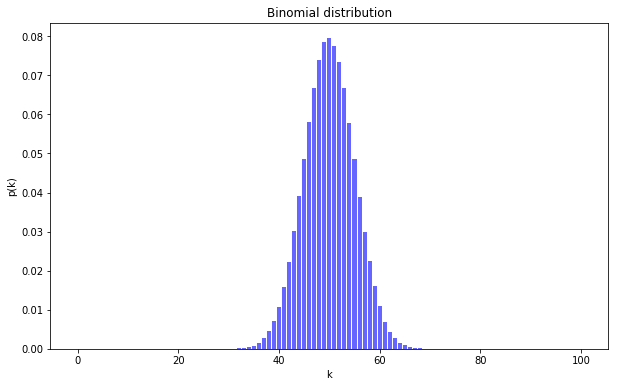

In [73]:
figure(figsize=(10,6))
title("Binomial distribution")
xlabel ("k")
ylabel ("p(k)")
_=hist(fair, bins=bins, normed=True, align='left', histtype='bar', rwidth=0.8, color='b', alpha=0.6, label="n = %d, trials = %d, p=%0.2f"%(n,trials, 0.5))


## Now, let's replace the fair die with something different...

In [76]:
n = 100
bins=np.arange(0,n+2,1)
trials = 1000000

unfair = np.random.binomial(n, 0.6, trials)

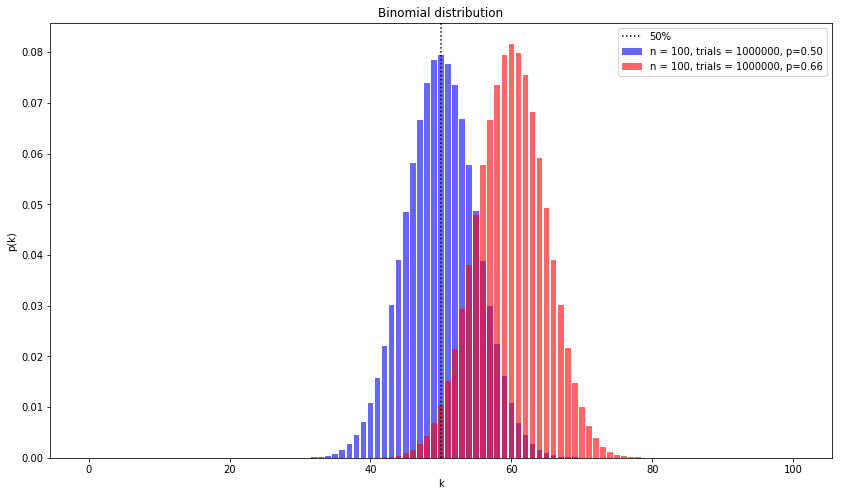

In [82]:
figure(figsize=(14,8))
title("Binomial distribution")
xlabel ("k")
ylabel ("p(k)")
_=hist(fair, bins=bins, normed=True, align='left', histtype='bar', rwidth=0.8, color='b', alpha=0.6, label="n = %d, trials = %d, p=%0.2f"%(n,trials, 0.5))
_=hist(unfair, bins=bins, normed=True, align='left', histtype='bar', rwidth=0.8, color='r', alpha=0.6, label="n = %d, trials = %d, p=%0.2f"%(n,trials,0.66))
axvline(50, ls=":", c="k", label="50%")
legend()

# Birthday problem

## How can we deal with it numerically and theoretically?

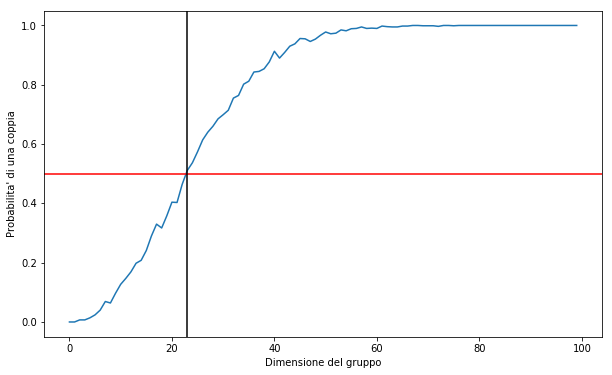

In [87]:

figure(figsize=(10,6))

tentativi = 1000
max_persone = 100

lista_multipli = [0 for i in range(max_persone)]
for t in range(0, tentativi):
    for n in range(1, max_persone):
        #print "Gruppo composto da:", n
        lista_date = []
        for i in range(n):

            giorno = random.randint(366)
            if giorno in lista_date:
                #print "stesso compleanno!", giorno
                lista_multipli[n] += 1.0/tentativi
                break
            lista_date.append(giorno)
plot(range(max_persone), lista_multipli)
ylabel("Probabilita' di una coppia")
xlabel("Dimensione del gruppo")

axhline(0.5, c='r')
axvline(23, c='k', label="Soglia del 50%")


# Linear regressions

## Let's generate some pseudo-random data with an explicit dependence...


Text(0.5,0,'X')

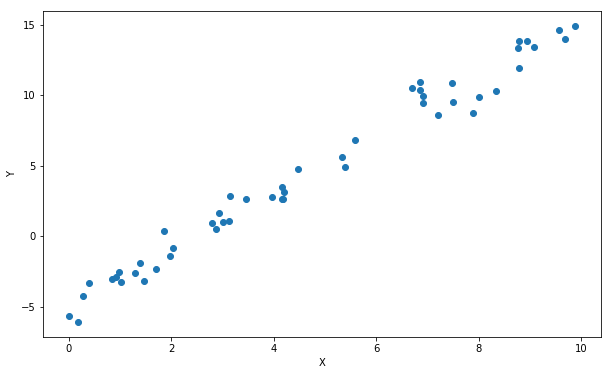

In [91]:
# let's fix the random number generator internal state
# in order to be able to reproduce it
# did you really think random numbers were really RANDOM?

rng = np.random.RandomState(1)

# let's create 50 values for the X variable
x = 10 * rng.rand(50)
# and 50 values for the (correlated) Y variable
y = 2 * x - 5 + rng.randn(50)

figure(figsize=(10,6))
scatter(x, y)
ylabel("Y")
xlabel("X")


### What kind of model fits best with the data?

#### of course a linear model!

('Model slope:    ', 2.0272088103606953)
('Model intercept:', -4.998577085553204)


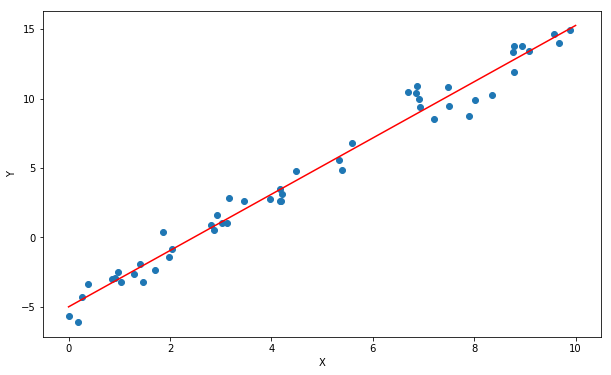

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

figure(figsize=(10,6))
scatter(x, y)
plot(xfit, yfit, c='r');
ylabel("Y")
xlabel("X")

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)


## Let's create some blobs of points in 2 dimensions
### each point has a HIDDEN label
### we have to guess how many labels are necessary...

Text(0.5,0,'$X_2$')

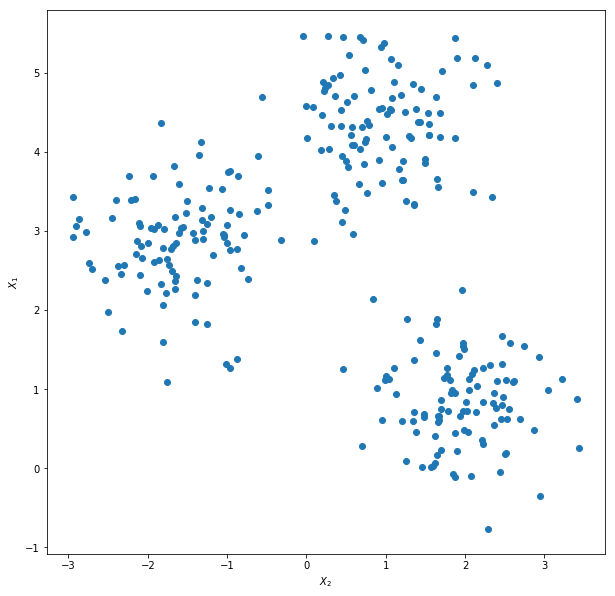

In [112]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0) # change the with of each normal...

figure(figsize=(10,10))
scatter(X[:, 0], X[:, 1]) # 2D data is encoded in a multidimensional array

ylabel("$X_1$")
xlabel("$X_2$")


## What about k-means to assign a label to our data?

### let's say 3 clusters are enough

In [113]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) # Try to change this!
kmeans.fit(X)
y_kmeans = kmeans.predict(X) # y contains the label for each point

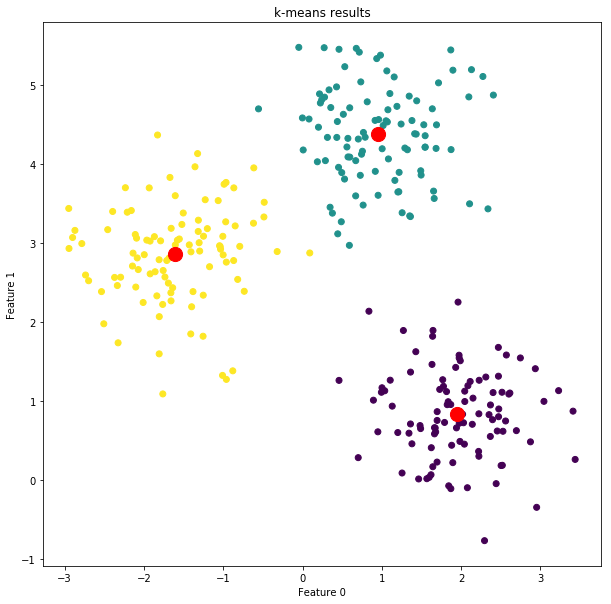

In [114]:
figure(figsize=(10,10))

scatter(X[:, 0], X[:, 1], c=y_kmeans)

xlabel("Feature 0")
ylabel("Feature 1")
title("k-means results")
#legend(["Class 0", "Class 1", "Class 2"])

centers = kmeans.cluster_centers_
scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1)



Text(0.5,1,'Ground truth')

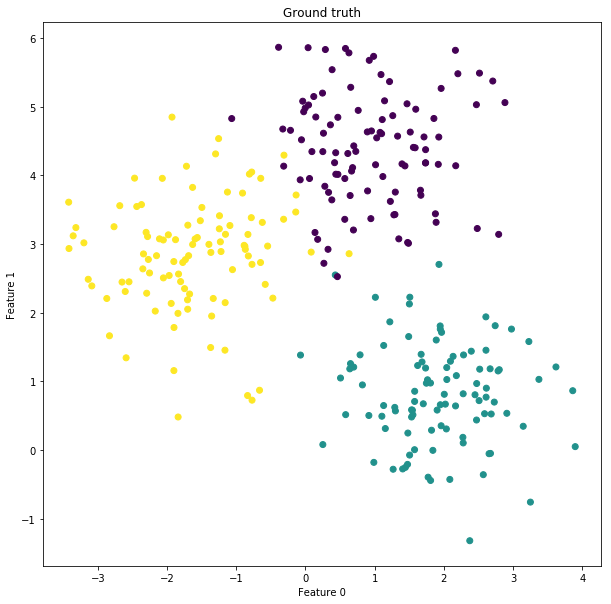

In [111]:
figure(figsize=(10,10))
scatter(X[:, 0], X[:, 1], c=y_true)
xlabel("Feature 0")
ylabel("Feature 1")
title("Ground truth")
#legend(["Class 0", "Class 1", "Class 2"])
#legend()

## Now, let's create some tougher data to deal with...

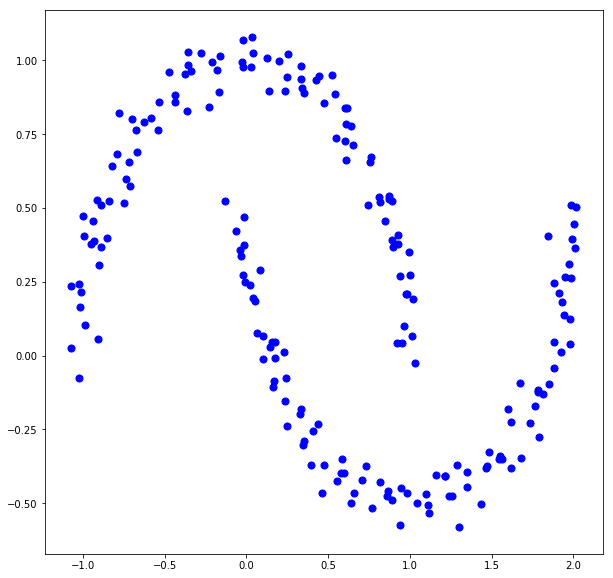

In [115]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

figure(figsize=(10,10))

scatter(X[:, 0], X[:, 1], c="b",
            s=50, cmap='viridis');



## Let's try again our k-means...

Text(0.5,1,'k-means results')

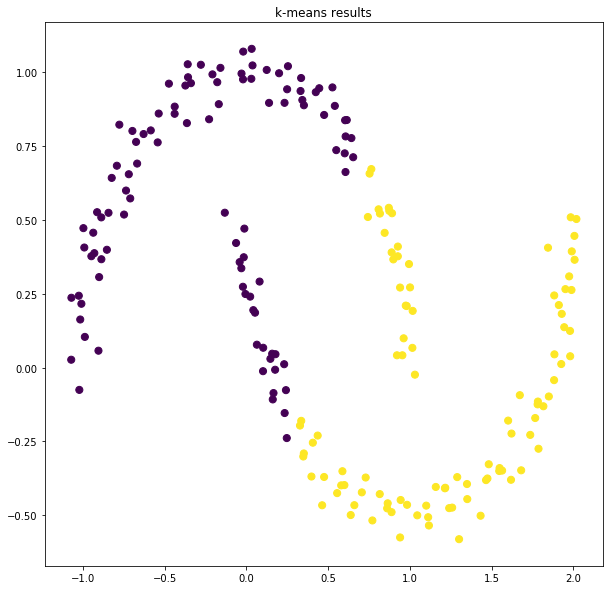

In [116]:

figure(figsize=(10,10))
labels = KMeans(2, random_state=0).fit_predict(X)
scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
title("k-means results")


# Big fail! This dataset is not linearly separable.


## We need to use more powerful clustering methods...

/home/mcogoni/.local/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/mcogoni/.local/lib/python2.7/site-packages/sklearn/utils/graph.py:115: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, np.int)


Text(0.5,1,'Spectral clustering')

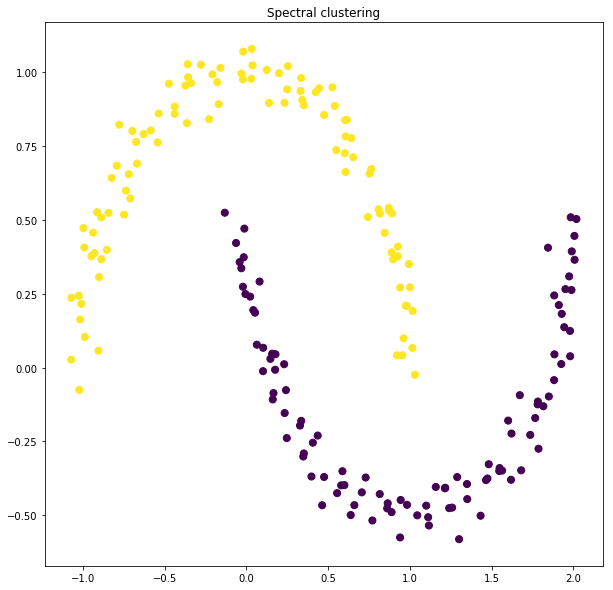

In [117]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
figure(figsize=(10,10))

scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
title("Spectral clustering")